<a href="https://colab.research.google.com/github/MarcoM95/MLPNS2021/blob/main/MLPNS2021_ClassStats_23_03_21_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
import numpy as np
import pylab as plt
from numpy import random

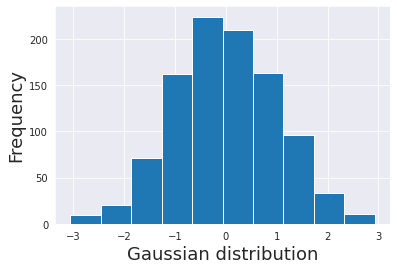

In [229]:
plt.hist(np.random.randn(1000));
plt.xlabel('Gaussian distribution', fontsize = 18);
plt.ylabel('Frequency', fontsize = 18);

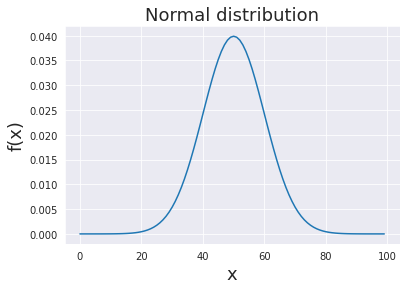

In [230]:
def mygauss(x, mu, sig):
  return 1/np.sqrt(2*np.pi)/sig * (np.exp(-(x-mu)**2/2/sig**2))

x   = np.arange(100)
mu  = 50.
sig = 10.
mygauss(x,mu,sig);

plt.plot(x,mygauss(x,mu,sig))

plt.title('Normal distribution', fontsize = 18)
plt.xlabel('x', fontsize = 18);
plt.ylabel('f(x)', fontsize = 18);

In [231]:
import scipy as sp
from scipy import stats

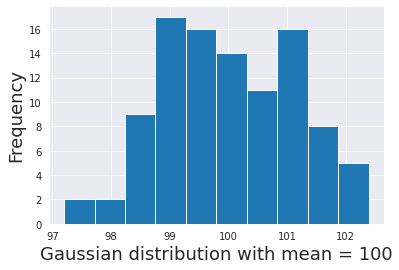

In [232]:
np.random.seed(123)                        # fix seed
plt.hist(sp.stats.norm.rvs(100,size=100)); # Gaussian with Mean = 100

plt.xlabel('Gaussian distribution with mean = 100', fontsize = 18);
plt.ylabel('Frequency', fontsize = 18);

In [233]:
np.random.seed?

In [234]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

# **Homework 2**
* GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.
* For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
* Describe the behavior you see in the plots in terms of the law of large numbers.
* PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing Extra Credit: FIT a gaussian to the distribution of means

In [235]:
from __future__ import print_function
__author__= 'fbb'

import numpy as no
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit, minimize
    
%pylab inline
# this package sets up pretty plots
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


##choose which distributions to use

In [270]:
distributions = ['chisq', 'gauss', 'poisson']
#distributions = ['chisq', 'gauss', 'poisson' 'cauchy', 'lnorm', 'binomial']
#distributions = ['chisq']

##and which mean to give it

In [237]:
mymean = 100

#**Chi squared**

In [238]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

##I am making a dictionary to host the distributions.
###that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful! 
###Lets start by looking at a single chi sq distribution

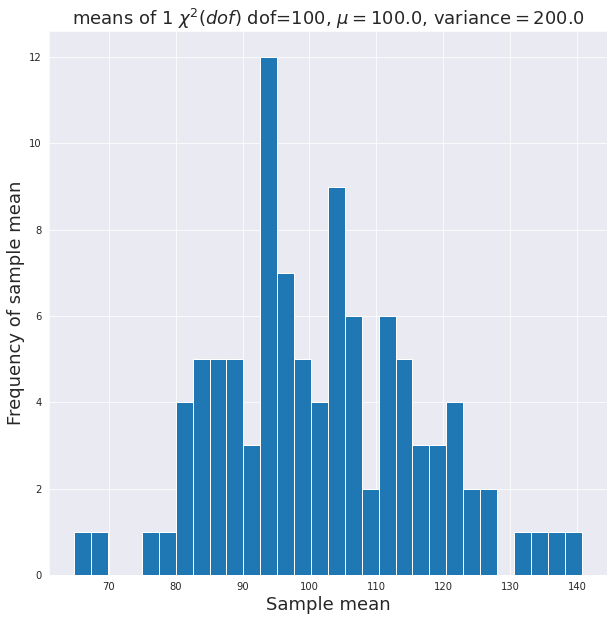

In [239]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(123)
md = {}
# md is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'

plt.figure(figsize=(10, 10));
plt.hist(md['chisq'], bins = 30);
plt.xlabel('Sample mean', fontsize = 18);
plt.ylabel('Frequency of sample mean', fontsize = 18);
plt.title('means of 1 $\chi^2(dof)$ dof=%d, '%df +
            '$\mu=%.1f$, variance$=%.1f$'%(df, df * 2), fontsize = 18);

Chi-square(dof) distribution.

In [240]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.64, standard deviation: 14.76


## **Now let's do it for 100 Chisq distributions**
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we will discuss in class)

In [241]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


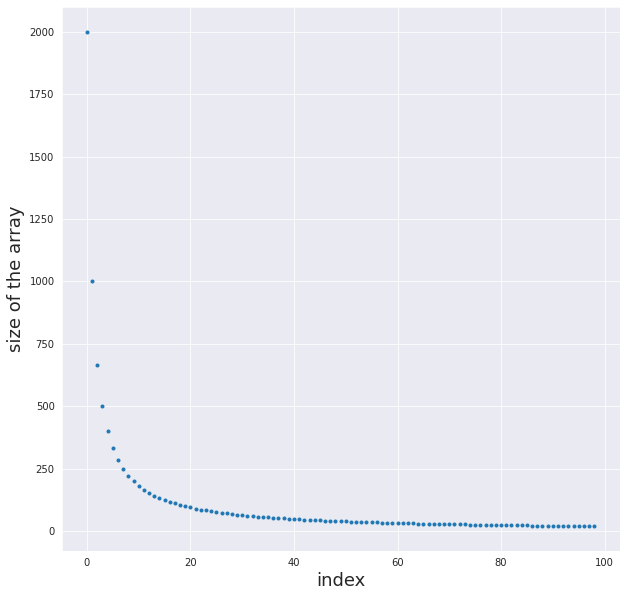

In [242]:
plt.figure(figsize=(10, 10));
plt.plot(mysize, '.');
plt.xlabel("index", fontsize = 18);
plt.ylabel("size of the array", fontsize = 18);

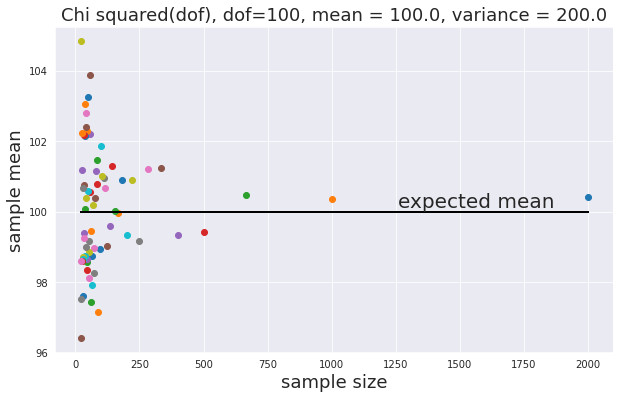

In [243]:
np.random.seed(123)

# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = plt.figure(figsize=(10,6)).add_subplot(111);

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o');
        axchisq_mu_n.set_xlabel('sample size', fontsize=18);
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18);
        axchisq_mu_n.set_title('Chi squared(dof), dof=%d, mean = %.1f, variance = %.1f'%(df,df,df*2), fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k');
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20);

Figure 2: The distribution of means of the sample is plotted against the size of the sample. The distribution of means narrows toward the true mean of the population, which is marked by a black horizontal line, as N increases. (Notice: for optimal visibility of this effect I chose the size so that more small distributions are generated, and the plot has equal density at all points in the x axis.)

##**now the histogram of the mean of all samples:**
### **this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one**
a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

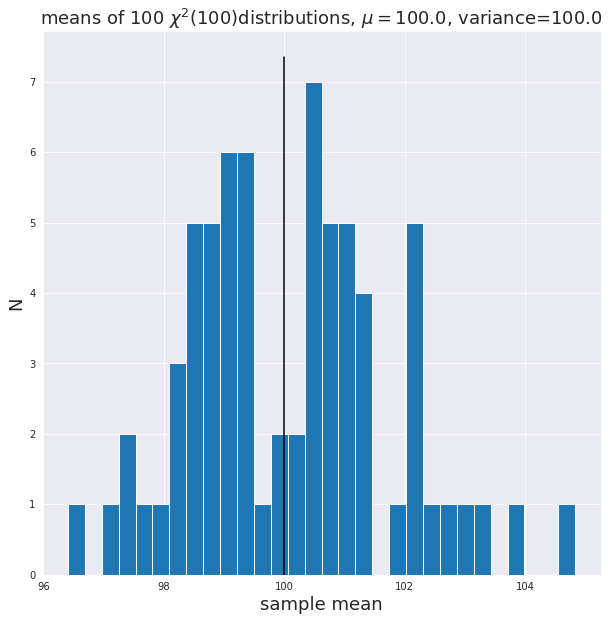

In [244]:
np.random.seed(123)

allmeans = list(md['chisq']['means'].values())

plt.figure(figsize=(10, 10));
plt.hist(allmeans, bins=30);
plt.plot([mymean, mymean], plt.ylim(), 'k-');
plt.title('means of 100 $\chi^2(%d)$'%df+'distributions, $\mu=%.1f$'%df+
          ', variance=%.1f'%df, fontsize = 18);
plt.xlabel('sample mean', fontsize = 18);
plt.ylabel('N', fontsize = 18);

# **Normal distribution**

Text(1259.3999999999999, 100, 'expected mean')

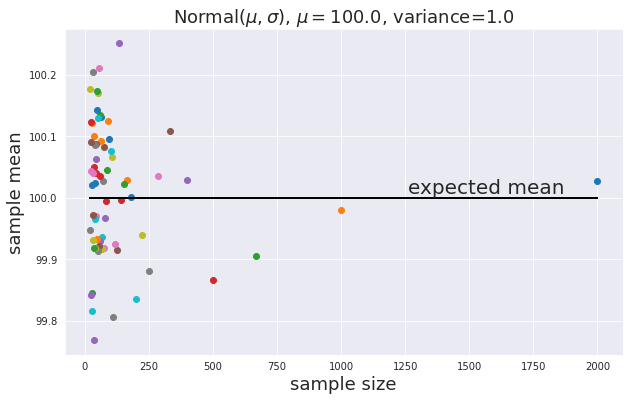

In [245]:
np.random.seed(123)

# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['gauss'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['gauss'][n] = stats.norm.rvs(mymean, sigma, 100)
    
# save the means for plotting later    

md['gauss']['means'] = {}
axgauss_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gauss']:
    if not type(nn) == str:
        md['gauss']['means'][nn] = md['gauss'][nn].mean()
        #and plot it
        axgauss_mu_n.plot(nn, md['gauss']['means'][nn], 'o')
        axgauss_mu_n.set_xlabel('sample size', fontsize=18)
        axgauss_mu_n.set_ylabel('sample mean', fontsize=18)
        axgauss_mu_n.set_title('Normal($\mu,\sigma$), $\mu=%.1f$, variance=%0.1f'%(mymean,sigma), fontsize=18)
        axgauss_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axgauss_mu_n.text(axgauss_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 3: The distribution of means of the sample narrows toward the true mean of the population as N increases.

Text(0, 0.5, 'N')

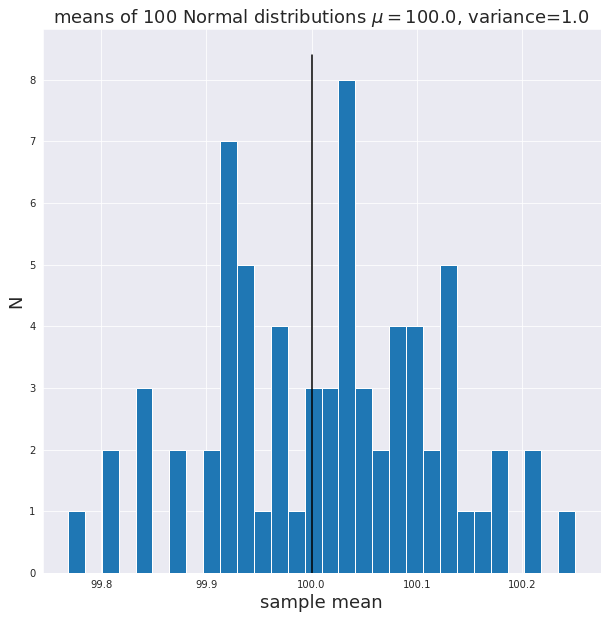

In [246]:
np.random.seed(123)

allmeans = list(md['gauss']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.plot([mymean, mymean], plt.ylim(), 'k-');
plt.title('means of 100 Normal distributions $\mu=%.1f$, variance=%.1f'%(mymean,variance), fontsize = 18)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)

#**Poisson**

Text(1259.3999999999999, 100, 'expected mean')

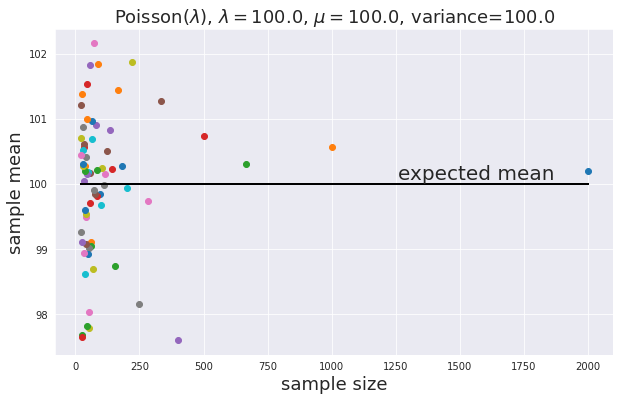

In [247]:
np.random.seed(123)

# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['poisson'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['poisson'][n] = np.random.poisson(mymean, 100)
    
# save the means for plotting later    

md['poisson']['means'] = {}
axpoisson_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson($\lambda$), $\lambda=%.1f$, $\mu=%.1f$, variance=%.1f'%(mymean,mymean,mymean), fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpoisson_mu_n.text(axpoisson_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 5: The distribution of means of the sample narrows toward the true mean of the population as N increases.

Text(0, 0.5, 'Frequency of sample mean')

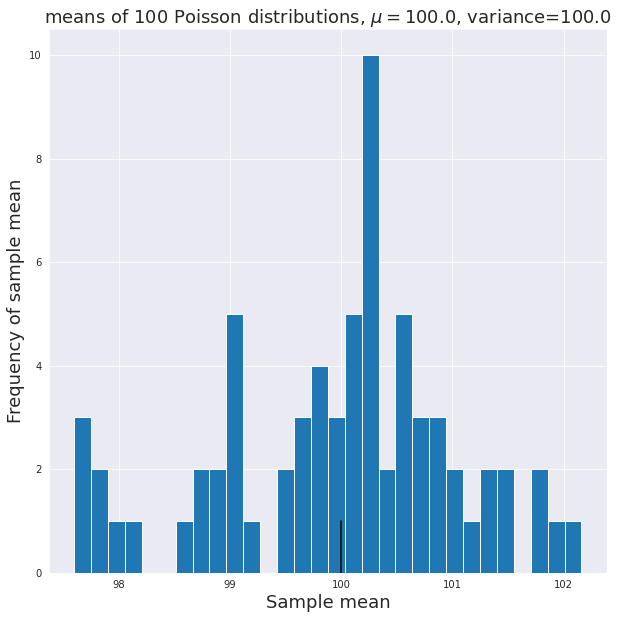

In [248]:
np.random.seed(123)

allmeans = list(md['poisson']['means'].values())

plt.figure(figsize=(10, 10))
plt.plot([mymean, mymean], plt.ylim(), 'k-');
plt.title('means of 100 Poisson distributions, $\mu=%.1f$, variance=%.1f'%(mymean,mymean), fontsize=18)
plt.hist(allmeans,bins=30)
plt.xlabel('Sample mean', fontsize = 18)
plt.ylabel('Frequency of sample mean', fontsize = 18)

In [266]:
def mygauss(x, mu, sig):
  return 1/np.sqrt(2*np.pi)/sig * (np.exp(-(x-mu)**2/2/sig**2))

Gaussian fit parameters (fixed sigma): mean={0:.1f}, stdev=4.5e-02, 1.0/(N**0.5)=4.5e-02
Chi square of gaussian fit: $\chi^2$/DOF=2.1


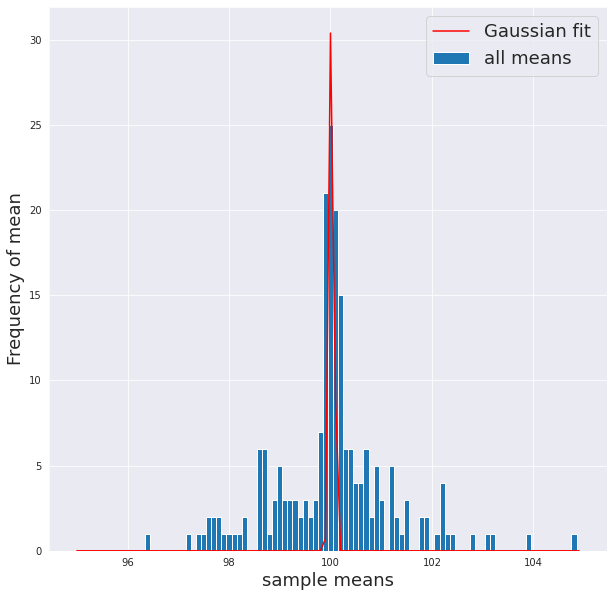

In [287]:
import scipy as sp

distall = []
for d in distributions:
    distall = distall + list(md[d]['means'].values())
fig = plt.figure(figsize=(10, 10))
h, b, apatch = plt.hist(distall, bins=np.arange(95 - 0.05, 105 + 0.05, 0.1),
                      label = "all means")
herr = np.sqrt(h)

# Fit a normal distribution to the data:
mu, sig = sp.stats.norm.fit(distall, fscale = 1.0 / np.sqrt(500.))
print(r"Gaussian fit parameters (fixed sigma): mean={0:.1f}, " + 
      "stdev={1:.1e}, 1.0/(N**0.5)={2:.1e}".\
      format(mu, sig, 1.0 / np.sqrt(500.)))
print(r"Chi square of gaussian fit: $\chi^2$/DOF={:.1f}".\
      format(sum((80 * mygauss(np.arange(25, 35, 0.1)[h > 0], mu, sig) - \
                  h[h > 0])**2 / (herr[h > 0]**2) ) / (len(h)-1)))
plt.plot(np.arange(95, 105, 0.1), 4 * mygauss(np.arange(95, 105, 0.1), 
                                            mu, sig), 'r-', 
        label="Gaussian fit")
plt.xlabel("sample means", fontsize=18)
plt.ylabel("Frequency of mean", fontsize=18)
plt.legend(fontsize=18)


Figure 11: The distribution of all means looks like a gaussian and is well fit by a gaussian function (red line) with parameters $\mu$=30.0 and $\sigma$=$1/\sqrt(N)$, wich a reduced $\chi^2$ for the fit $\chi^2=0.8$.

The means of the samples of each distributions are normally distributed, hence it is not surprising that the total distribution should be well fit by a Gaussian